# Data Modeling and Predication

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,auc,f1_score,recall_score,roc_curve,accuracy_score
from sklearn.metrics import precision_score,confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import KMeansSMOTE
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [43]:
train = pd.read_csv("/transaction/new_train.csv")
test = pd.read_csv("/transaction/new_test.csv")

In [44]:
train = train.drop(["Unnamed: 0"], axis = 1)
test = test.drop(["Unnamed: 0"], axis = 1)

In [45]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_166_rounded,var_166_rounded_10,var_166_rounded_100,mean_r,min_r,max_r,std_r,skew_r,kurto_r,median_r
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,3.0,26.0,255.0,79.374830,-949.0000,2295.0,312.640056,4.385541,22.153505,8.1462
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,3.0,32.0,322.0,73.461544,-523.0000,1913.0,264.178893,4.515028,22.448034,7.0196
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,3.0,31.0,312.0,72.673821,-1542.0000,2740.0,335.879853,3.832534,25.356591,8.1036
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,3.0,26.0,264.0,97.813245,-21.4797,2487.0,328.830157,4.551857,22.497653,8.9289
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,3.0,32.0,323.0,98.352646,-24.8254,2620.0,322.426415,4.404495,21.474163,8.7003


In [46]:
train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_166_rounded,var_166_rounded_10,var_166_rounded_100,mean_r,min_r,max_r,std_r,skew_r,kurto_r,median_r
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,3.0,27.0,270.0,81.106056,-515.0000,2436.0,306.620331,4.611336,23.434913,8.00000
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,3.0,32.0,320.0,84.742780,-1177.0000,3026.0,329.029976,4.804795,31.320021,8.00000
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,3.0,33.0,328.0,85.271241,-799.0000,2568.0,324.172198,4.788561,26.147700,7.00000
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,3.0,26.0,259.0,79.760715,-35.1659,1797.0,267.708988,4.386941,19.680906,8.00000
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,3.0,32.0,323.0,90.876331,-149.0000,2827.0,336.697571,5.050650,27.937259,7.83945


In [47]:
test.shape

(200000, 304)

In [48]:
train.shape

(200000, 305)

In [49]:
y=train.target
x=train.drop(['Id', 'target'], axis = 1)

In [50]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.25,stratify=y)

In [51]:
# printing the shapes of the training sets and validation sets
print("The shape of the training set :",x_train.shape,y_train.shape)
print("The shape of the validation set :",x_val.shape,y_val.shape)

The shape of the training set : (150000, 303) (150000,)
The shape of the validation set : (50000, 303) (50000,)


In [52]:
for i in test.columns.values:
    if i not in x_train.columns.values:
        print( i)

ID_code


In [53]:
# Standardising the data 
sc=StandardScaler()
sc.fit(x_train)

StandardScaler()

In [54]:
# Trqansforming the datasets
x_train_norm=sc.transform(x_train)
x_val_norm=sc.transform(x_val)

In [55]:
x=pd.concat([x_train,y_train],axis=1)

In [56]:
target_0=x.loc[x["target"]==0]
target_1=x.loc[x["target"]==1]

In [57]:
target_0_downsample=resample(target_0,replace=False,n_samples=len(target_1),)

In [58]:
downsamples=pd.concat([target_0_downsample,target_1])

In [59]:
# printing the number of class0 and class1
downsamples.target.value_counts()

1    15074
0    15074
Name: target, dtype: int64

In [60]:
def roc_plot(fpr,tpr,fpr_val,tpr_val):
    plt.figure(figsize=(6,6))
    plt.plot(fpr,tpr)
    plt.plot(fpr_val,tpr_val)
    plt.plot([0+0.01,1-0.01],[0+0.01,1-0.01],linestyle='dashed')
    plt.legend(["train set","validation"])
    plt.xlabel("False positive rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC_AUC_CURVE")
    plt.show()
    

def Prediction(model):
    y_pre_prob_train=model.predict_proba(x_train)
    y_pre_prob_val=model.predict_proba(x_val)
    y_pre_train=model.predict(x_train)
    y_pre_val=model.predict(x_val)
    print("----------------Roc_Auc_score------------")
    print("Train_data :",roc_auc_score(y_train,y_pre_prob_train[:,1]))
    print("Validation :",roc_auc_score(y_val,y_pre_prob_val[:,1]))
    print("="*50)
    print("---------F1-Score--------------------")
    print("Train_data :",f1_score(y_train,y_pre_train))
    print("Validation :",f1_score(y_val,y_pre_val))
    
    print("-------Recall Score--------------------")
    print("Train_data :",recall_score(y_train,y_pre_train))
    print("Validation :",recall_score(y_val,y_pre_val))
    
    print("-------Precision Score--------------------")
    print("Train_data :",precision_score(y_train,y_pre_train))
    print("Validation :",precision_score(y_val,y_pre_val))
    
    print("-------Accuracy Score--------------------")
    print("Train_data :",accuracy_score(y_train,y_pre_train))
    print("Validation :",accuracy_score(y_val,y_pre_val))
    
    fpr_tr, tpr_tr, thresholds = roc_curve(y_train,y_pre_prob_train[:,1])
    fpr_val,tpr_val, thresh=roc_curve(y_val,y_pre_prob_val[:,1])
    roc_plot(fpr_tr,tpr_tr,fpr_val,tpr_val)
    
def Prediction_norm(model):
    y_pre_prob_train=model.predict_proba(x_train_norm)
    y_pre_prob_val=model.predict_proba(x_val_norm)
    y_pre_train=model.predict(x_train_norm)
    y_pre_val=model.predict(x_val_norm)
    print("----------------Roc_Auc_score------------")
    print("Train_data :",roc_auc_score(y_train,y_pre_prob_train[:,1]))
    print("Validation :",roc_auc_score(y_val,y_pre_prob_val[:,1]))
    print("="*50)
    print("---------F1-Score--------------------")
    print("Train_data :",f1_score(y_train,y_pre_train))
    print("Validation :",f1_score(y_val,y_pre_val))
    
    print("-------Recall Score--------------------")
    print("Train_data :",recall_score(y_train,y_pre_train))
    print("Validation :",recall_score(y_val,y_pre_val))
    
    print("-------Precision Score--------------------")
    print("Train_data :",precision_score(y_train,y_pre_train))
    print("Validation :",precision_score(y_val,y_pre_val))
    
    print("-------Accuracy Score--------------------")
    print("Train_data :",accuracy_score(y_train,y_pre_train))
    print("Validation :",accuracy_score(y_val,y_pre_val))
    
    
    
    fpr_tr, tpr_tr, thresholds = roc_curve(y_train,y_pre_prob_train[:,1])
    fpr_val,tpr_val, thresh=roc_curve(y_val,y_pre_prob_val[:,1])
    roc_plot(fpr_tr,tpr_tr,fpr_val,tpr_val)

In [61]:
model=LogisticRegression(max_iter=500,C=30)


In [62]:
model.fit(x_train_norm,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=30, max_iter=500)

----------------Roc_Auc_score------------
Train_data : 0.8675818764520795
Validation : 0.8674203072849044
---------F1-Score--------------------
Train_data : 0.419068942998414
Validation : 0.4111126701276835
-------Recall Score--------------------
Train_data : 0.2979965503515988
Validation : 0.2916003184713376
-------Precision Score--------------------
Train_data : 0.7058453802639849
Validation : 0.6966238706609605
-------Accuracy Score--------------------
Train_data : 0.9169733333333333
Validation : 0.91606


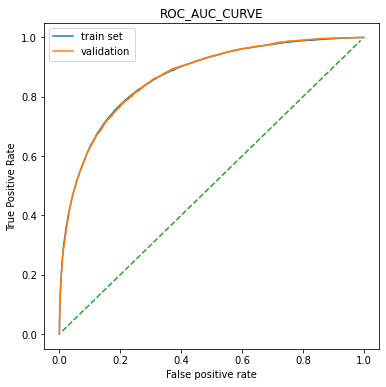

In [63]:
Prediction_norm(model)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


----------------Roc_Auc_score------------
Train_data : 0.8667255566646745
Validation : 0.8657783399200027
---------F1-Score--------------------
Train_data : 0.42508623167576887
Validation : 0.42068595927116825
-------Recall Score--------------------
Train_data : 0.7848613506700278
Validation : 0.78125
-------Precision Score--------------------
Train_data : 0.2914757329391476
Validation : 0.28784100909357585
-------Accuracy Score--------------------
Train_data : 0.7866533333333333
Validation : 0.7838


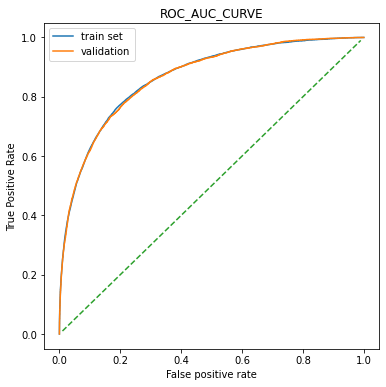

In [64]:
# Building the Model for the balanced dataset > here we use downsampledata
model_lr_1=LogisticRegression(C=5,max_iter=500)
model_lr_1.fit(sc.transform(downsamples.iloc[:,:-1]),downsamples.iloc[:,-1])
Prediction_norm(model_lr_1)

----------------Roc_Auc_score------------
Train_data : 0.7022834295553622
Validation : 0.6480554822975649
---------F1-Score--------------------
Train_data : 0.25968468468468464
Validation : 0.09824919258881523
-------Recall Score--------------------
Train_data : 0.15297863871566936
Validation : 0.05752388535031847
-------Precision Score--------------------
Train_data : 0.8585256887565152
Validation : 0.33643771827706637
-------Accuracy Score--------------------
Train_data : 0.9123466666666666
Validation : 0.8939


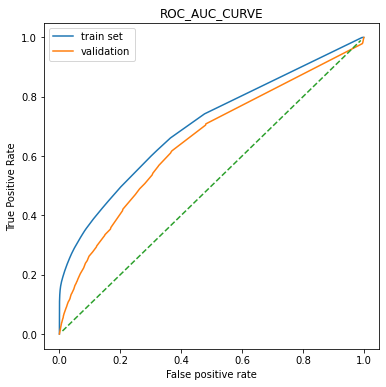

In [65]:
model_rf=DecisionTreeClassifier(max_depth=10)
model_rf.fit(x_train,y_train)
Prediction(model_rf)

----------------Roc_Auc_score------------
Train_data : 0.7521637273824272
Validation : 0.6201306655835694
---------F1-Score--------------------
Train_data : 0.3425856995994186
Validation : 0.25134763767043655
-------Recall Score--------------------
Train_data : 0.6411038874883906
Validation : 0.473328025477707
-------Precision Score--------------------
Train_data : 0.23374613003095976
Validation : 0.1711037559361059
-------Accuracy Score--------------------
Train_data : 0.7527333333333334
Validation : 0.71668


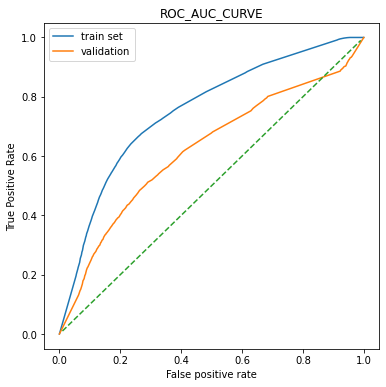

In [66]:
model_df_1=DecisionTreeClassifier(max_depth=12)
model_df_1.fit(downsamples.iloc[:,:-1],downsamples.iloc[:,-1])
Prediction(model_df_1)

----------------Roc_Auc_score------------
Train_data : 0.85980641301351
Validation : 0.7524006920817783
---------F1-Score--------------------
Train_data : 0.1456513716324271
Validation : 0.011457921770051362
-------Recall Score--------------------
Train_data : 0.07854584052010083
Validation : 0.005772292993630573
-------Precision Score--------------------
Train_data : 1.0
Validation : 0.7631578947368421
-------Accuracy Score--------------------
Train_data : 0.9074
Validation : 0.89992


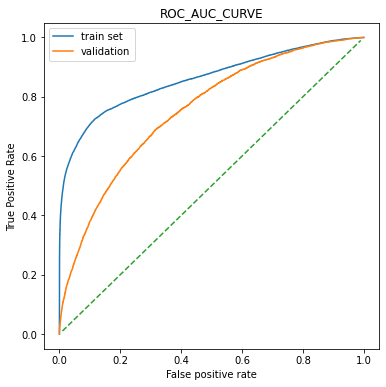

In [67]:
model_rf=RandomForestClassifier(max_depth=12,n_estimators=15)
model_rf.fit(x_train,y_train)
Prediction(model_rf)

----------------Roc_Auc_score------------
Train_data : 0.8561987575689796
Validation : 0.7311687495716045
---------F1-Score--------------------
Train_data : 0.38942891859052253
Validation : 0.2962789169912252
-------Recall Score--------------------
Train_data : 0.8079474592012738
Validation : 0.6283837579617835
-------Precision Score--------------------
Train_data : 0.2565404221257952
Validation : 0.19383557438447843
-------Accuracy Score--------------------
Train_data : 0.7454
Validation : 0.70006


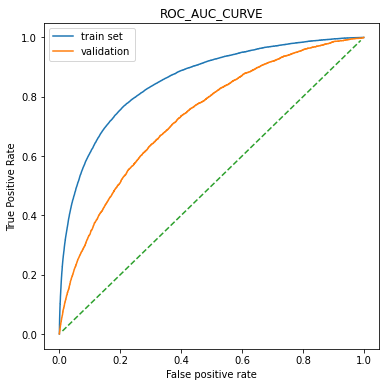

In [68]:
model_rf_1=RandomForestClassifier(max_depth=12,n_estimators=13)
model_rf_1.fit(downsamples.iloc[:,:-1],downsamples.iloc[:,-1])
Prediction(model_rf_1)

----------------Roc_Auc_score------------
Train_data : 0.9577514866398906
Validation : 0.8636218022931409
---------F1-Score--------------------
Train_data : 0.6282205313042317
Validation : 0.3575685339690107
-------Recall Score--------------------
Train_data : 0.4682897704657025
Validation : 0.23885350318471338
-------Precision Score--------------------
Train_data : 0.9540478443032843
Validation : 0.7109004739336493
-------Accuracy Score--------------------
Train_data : 0.9443
Validation : 0.91376


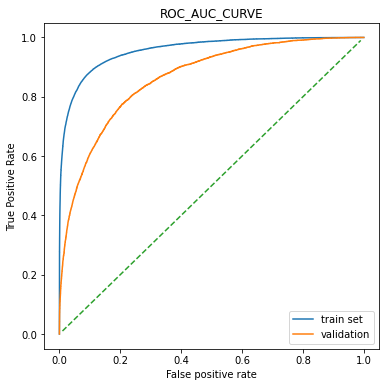

In [69]:
model_xg=XGBClassifier(max_depth=5)
model_xg.fit(x_train,y_train)
Prediction(model_xg)

----------------Roc_Auc_score------------
Train_data : 0.9422084385673736
Validation : 0.8604358121394398
---------F1-Score--------------------
Train_data : 0.5084152367754052
Validation : 0.4183169659812273
-------Recall Score--------------------
Train_data : 0.9248374684887887
Validation : 0.7673168789808917
-------Precision Score--------------------
Train_data : 0.35056705308421554
Validation : 0.2875363616021481
-------Accuracy Score--------------------
Train_data : 0.8202733333333333
Validation : 0.78558


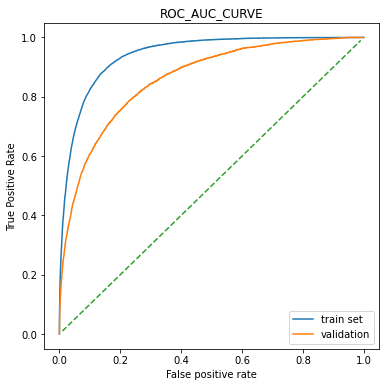

In [70]:
model_xg=XGBClassifier(max_depth=5)
model_xg.fit(downsamples.iloc[:,:-1],downsamples.iloc[:,-1])
Prediction(model_xg)